# Inaugural Project

> **Note the following:** 
> 1. The `inauguralproject.py` file includes a definitions of functions which is used multiple times in this notebook.

Imports and set magics:

In [151]:
# Import modules
import numpy as np
from types import SimpleNamespace
from scipy import optimize 
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes.
%load_ext autoreload
%autoreload 2

# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

I use the utility functions defined in the py-file, and set up a for-loop with conditions for pareto improvements of the initial endowment.

In [164]:
# Create the set C
N = 75
list_C = [i/N for i in range(N+1)]

# Create empty lists for the results
x1A_pareto = []
x2A_pareto = []

# Set up conditions for pareto improvements and append the pareto approvements to the empty lists
for x1A in list_C:
    for x2A in list_C:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A,x2A)>=model.utility_A(par.w1A,par.w2A) and model.utility_B(x1B,x2B)>=model.utility_B(par.w1B,par.w2B):
            x1A_pareto.append(x1A)
            x2A_pareto.append(x2A)

# Merge the lists for coordinates 
pareto_improvements = x1A_pareto , x2A_pareto

The for-loop creates a list of pareto improvements. I plot the pareto improvement below with pink circles. The initial endowment is shown by the black square.

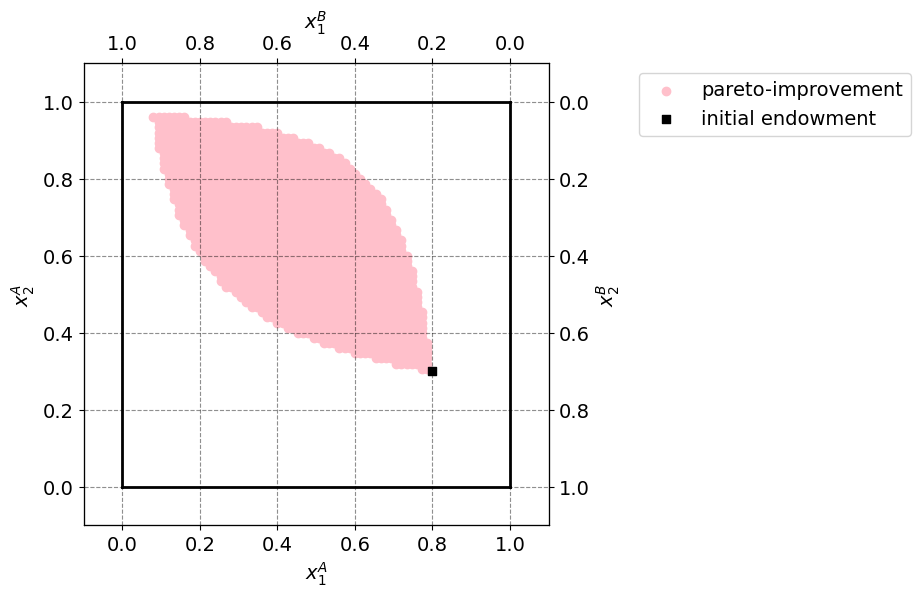

In [165]:
# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the possible pareto-improvements
ax_A.scatter(x1A_pareto , x2A_pareto , marker='o', color='pink', label='pareto-improvement')
# Plot the initial endowment
ax_A.scatter(par.w1A , par.w2A , marker='s' , color='black' , label='initial endowment')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

# Question 2

I create a list that p1 should be part of and use a for-loop on the check_market_clearing function from the py-file to print the market errors for given prices of p1.

For price 0.500 the errors are 0.533, -0.267
For price 0.527 the errors are 0.476, -0.251
For price 0.553 the errors are 0.424, -0.235
For price 0.580 the errors are 0.377, -0.219
For price 0.607 the errors are 0.334, -0.203
For price 0.633 the errors are 0.295, -0.187
For price 0.660 the errors are 0.259, -0.171
For price 0.687 the errors are 0.225, -0.155
For price 0.713 the errors are 0.194, -0.139
For price 0.740 the errors are 0.166, -0.123
For price 0.767 the errors are 0.139, -0.107
For price 0.793 the errors are 0.114, -0.091
For price 0.820 the errors are 0.091, -0.075
For price 0.847 the errors are 0.069, -0.059
For price 0.873 the errors are 0.049, -0.043
For price 0.900 the errors are 0.030, -0.027
For price 0.927 the errors are 0.012, -0.011
For price 0.953 the errors are -0.006, 0.005
For price 0.980 the errors are -0.022, 0.021
For price 1.007 the errors are -0.037, 0.037
For price 1.033 the errors are -0.052, 0.053
For price 1.060 the errors are -0.065, 0.069
For price 

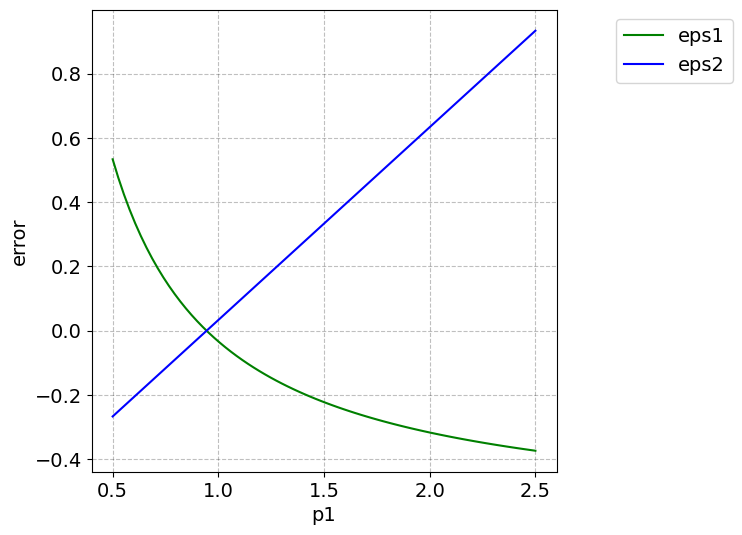

In [166]:
# Create discrete list for p1
N = 75
p_1 = [0.5+2*i/N for i in range(N+1)]

# Empty list for the errors
list_error1 = []
list_error2 = []

# Solve check_market_clearing-model in py-file to find errors
for p1 in p_1:
    error = model.check_market_clearing(p1)
    print(f'For price {p1:.3f} the errors are {error[0]:.3f}, {error[1]:.3f}')
    list_error1.append(error[0])
    list_error2.append(error[1])

# Plot the errors in a line plot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.plot(p_1, list_error1, color='green', label='eps1')
plt.plot(p_1, list_error2, color='blue', label='eps2')
plt.xlabel('p1')
plt.ylabel('error')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.4,1.0))
plt.show()

From the print it is clear that there is a root where eps1 changes from a positive number to a negtive number, and eps2 changes from a negative number to a positive number. 
From the printed list it is clear that the market clearing price for p1 is then between 0,9267 and 0,9534

# Question 3

I use the optimizer to find the market clearing price, by searching for the root of eps1. 

In [167]:
# Define an objective function (to find root)
def obj(p1):
    return model.check_market_clearing(p1)[0]

# The function optimize.root will solve objective = 0 starting from x0 = 1, which is the guess of the price of p1
res = optimize.root(fun = obj, x0 = 1)

# Print the market clearing price
print(f'The market clearing price: {res.x[0]:.3f}')

The market clearing price: 0.944


The market clearing price is p1 = 0.944 when p2 = 1 (set as numeraire).
The walras law states that market clearing in n-1 markets also insures market clearing in the last market. 

# Question 4a

I find the allocation when A maximizes her own utility, while she can only choose prices in `p1` 

In [175]:
# Set initial max utility of A to minus infinity
max_utility_A = -np.inf

# Create empty lists for the optimal allocation and prices 
max_prices = []
x1A_4a = []
x2A_4A = []

# Loop over the elements in p_1
for p1 in p_1:
    x1B,x2B = model.demand_B(p1)
    if 1 - x1B > 0 and 1 - x2B > 0:
        utility_A = model.utility_A(1 - x1B , 1 - x2B)

        if utility_A > max_utility_A:
            max_utility_A = utility_A
            max_prices = p1
            x1A_4a = (1 - x1B)
            x2A_4a = (1 - x2B)

# Print the results
print(f'A chooses the price for good 1 to be {max_prices:.3f}, and the allocation x1A = {x1A_4a:.3f} and x2A = {x2A_4a:.3f}, which gives A the utility {max_utility_A:.3f}')
print(f'The allocation for B is x1B = {1-x1A_4a:.3f} and x2B = {1-x2A_4a:.3f}), which gives utility {model.utility_B((1-x1A_4a),(1-x2A_4a)):.3f}')

A chooses the price for good 1 to be 1.887, and the allocation x1A = 0.619 and x2A = 0.641, which gives A the utility 0.634
The allocation for B is x1B = 0.381 and x2B = 0.359), which gives utility 0.373


# Question 4b

I find the allocation when A maximizes her own utility and can choose any positive price 

In [176]:
# Calculate the number of steps
start = 0.0001
stop = 1000
step_size = 0.0001
num_steps = int((stop - start) / step_size) + 1

# Generate the list
new_list = np.linspace(start, stop, num_steps)

# Set initial max utility of A to minus infinity
max_utility_A_new = -np.inf

# Create empty lists for the optimal allocation and prices 
max_prices_new = []
x1A_4b = []
x2A_4b = []

# Loop over the elements in p_1
for p1 in new_list:
    x1B,x2B = model.demand_B(p1)
    if 1 - x1B > 0 and 1 - x2B > 0:
        utility_A = model.utility_A(1 - x1B , 1 - x2B)

        if utility_A > max_utility_A_new:
            max_utility_A_new = utility_A
            max_prices_new = p1
            x1A_4b = (1 - x1B)
            x2A_4b = (1 - x2B)

# Print the results
print(f'A chooses the price for good 1 to be {max_prices_new:.3f}, and the allocation x1A = {x1A_4b:.3f} and x2A = {x2A_4b:.3f}, which gives A the utility {max_utility_A_new:.3f}')
print(f'The allocation for B is x1B = {1-x1A_4b:.3f} and x2B = {1-x2A_4b:.3f}), which gives utility {model.utility_B((1-x1A_4b),(1-x2A_4b)):.3f}')

A chooses the price for good 1 to be 1.899, and the allocation x1A = 0.621 and x2A = 0.640, which gives A the utility 0.634
The allocation for B is x1B = 0.379 and x2B = 0.360), which gives utility 0.373


It is clear that the difference in the allocation is minor between 4a and 4b, and the utility for A is the same. 

# Question 5a

In [170]:
# Set initial max utility of A to minus infinity
max_utility_A = -np.inf

# Create empty lists for the optimal allocation and prices 
max_allocation = []

C = zip(list_x1A , list_x2A)

# Loop over the elements in p_1
for x_1 , x_2 in C:
    allocation = model.utility_A(x_1,x_2)
    if model.utility_A(x_1,x_2) >= max_utility_A and model.utility_B(1 - x_1 , 1 - x_2) > model.utility_B(par.w1B , par.w2B):
            max_utility_A = allocation
            x1A_5a = x_1
            x2A_5a = x_2

# Print the results
print(f'A chooses the allocation to be x1A = {x1A_5a:.3f} and x2A = {x2A_5a:.3f}, which gives A the utility {max_utility_A:.3f}')
print(f'The allocation for B is x1B = {1-x1A_5a:.3f} and x2B = {1-x2A_5a:.3f}), which gives utility {model.utility_B((1-x1A_5a),(1-x2A_5a)):.3f}')

A chooses the allocation to be x1A = 0.560 and x2A = 0.853, which gives A the utility 0.742
The allocation for B is x1B = 0.440 and x2B = 0.147), which gives utility 0.305


# Question 5b

In [171]:
# Define objective function as the negative utility of A and B 
obj = lambda xA: - (model.utility_A(xA[0],xA[1])) 

# Set constraints for utility of B
constraints = ({'type': 'ineq', 'fun' : lambda xA: model.utility_B((1-xA[0]), 1-xA[1]) - model.utility_B(par.w1B , par.w2B) })

# Set bounds for the allocation         
bounds = ((0,1),(0,1))
                
# Set initial allocation
x0 = [0.1,0.1]

# Use optimizer to minimize the negative utility, given the bounds
result = optimize.minimize(obj,x0,method='SLSQP',bounds=bounds , constraints=constraints)
x1A_5b, x2A_5b = result.x

# Print maximum aggregate utility found by social planner
print(f'A chooses the allocation to be x1A = {x1A_5b:.3f} and x2A = {x2A_5b:.3f}), which gives A the utility {model.utility_A(x1A_5b,x2A_5b):.3f}')
print(f'The allocation for B is x1B = {1-x1A_5b:.3f} and x2B = {1-x2A_5b:.3f}), which gives utility {model.utility_B((1-x1A_5b),(1-x2A_5b)):.3f}')

A chooses the allocation to be x1A = 0.576 and x2A = 0.844), which gives A the utility 0.743
The allocation for B is x1B = 0.424 and x2B = 0.156), which gives utility 0.304


# Question 6a

In [172]:
# Define objective function as the negative utility of A and B 
obj = lambda xA: -(model.utility_A(xA[0],xA[1]) + model.utility_B((1 - xA[0]),(1 - xA[1]))) 

# Set bounds for the allocation         
bounds = ((0,1),(0,1))
                
# Set initial allocation
x0 = [0.1,0.1]

# Use optimizer to minimize the negative utility, given the bounds
result = optimize.minimize(obj,x0,method='SLSQP',bounds=bounds)
x1A_social, x2A_social = result.x

# Print maximum aggregate utility found by social planner
print(f'The allocation for A is x1A = {x1A_social:.3f} and x2A = {x2A_social:.3f}), which gives utility {model.utility_A(x1A_social,x2A_social):.3f}')
print(f'The allocation for B is x1B = {1-x1A_social:.3f} and x2B = {1-x2A_social:.3f}), which gives utility {model.utility_B((1-x1A_social),(1-x2A_social)):.3f}')

The allocation for A is x1A = 0.333 and x2A = 0.667), which gives utility 0.529
The allocation for B is x1B = 0.667 and x2B = 0.333), which gives utility 0.529


# Question 6b

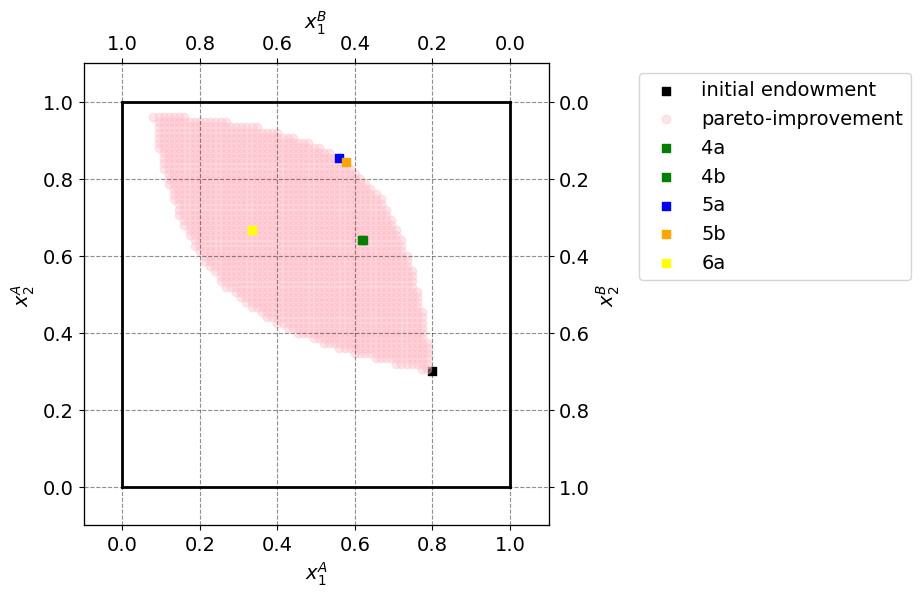

In [174]:
# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


# Plot the initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')
# Plot the possible pareto-improvements
ax_A.scatter(x1A_pareto,x2A_pareto,marker='o',alpha=0.4 , color='pink',label='pareto-improvement')
# Plot the solution from question 4a
ax_A.scatter(x1A_4a, x2A_4a, marker='s' , color='green',label='4a')
# Plot the solution from question 4b
ax_A.scatter(x1A_4b, x2A_4b, marker='s' , color='green',label='4b')
# Plot the solution from question 5a
ax_A.scatter(x1A_5a, x2A_5a , marker='s' , color='blue',label='5a')
# Plot the solution from question 5b
ax_A.scatter(x1A_5b , x2A_5b , marker='s' , color='orange',label='5b')
# Plot the solution from question 6a
ax_A.scatter(x1A_social , x2A_social , marker='s' , color='yellow',label='6a')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

# Question 7

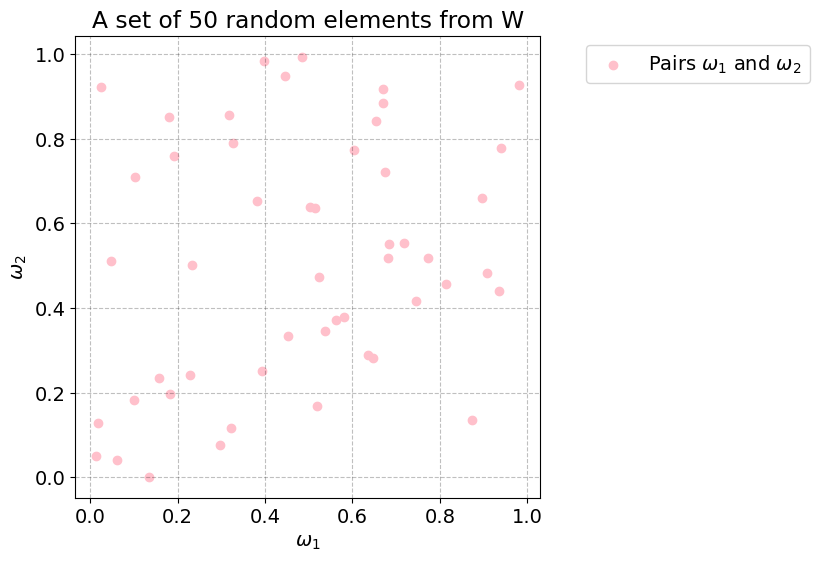

In [ ]:
np.random.seed(2002)

# Defining the function W with the two elements with a uniform distribution 
w_1_A = np.random.uniform(0 , 1, 50) 
w_2_A = np.random.uniform(0 , 1, 50)  
W = zip(w_1_A , w_2_A)

print(W)

# Display the 50 elements in a scatterplot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.title('A set of 50 random elements from W')
plt.scatter(w_1_A, w_2_A, color='pink', marker='o', label='Pairs $\omega_1$ and $\omega_2$')
plt.xlabel('$\omega_1$')
plt.ylabel('$\omega_2$')
plt.grid(True)
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))
plt.show()


# Question 8

In [ ]:
def check_market_clearing_new(p1):
        x1A, x2A = model.demand_A(p1)
        x1B, x2B = model.demand_B(p1)
        eps1 = x1A - par.w1A + x1B - (1 - par.w1A)
        eps2 = x2A - par.w2A + x2B - (1 - par.w2A)
        return (abs(eps1) < 1e-6 and abs(eps2) < 1e-6, x1A, x2A, x1B, x2B)

for Aw1, Aw2 in zip(w_1_A, w_2_A):
    # Step 3: Calculate market clearing price
    obj_func = lambda p1: check_market_clearing_new(p1)[0]
    p1_clearing = optimize.brentq(obj_func, 0.001, 1000)

    # Step 4: Check if the market clears and calculate allocations
    market_clears, x1A, x2A, x1B, x2B = check_market_clearing_new(p1_clearing)
    if market_clears:
        # Step 5: Print market clearing price and allocations
        print(f"Market clearing price: {p1_clearing:.3f}")
        print(f"A's allocation: x1A = {x1A:.3f}, x2A = {x2A:.3f}")
        print(f"B's allocation: x1B = {x1B:.3f}, x2B = {x2B:.3f}")
        print()

The project shows the Walras exchange economy. 